In [33]:
import pystare
import pystareplotlib
import pystareplotlib.pystareplotlib as psplot
from pystareplotlib.pystareplotlib import *

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import cartopy.crs as ccrs
import cartopy.feature as cf
from cartopy.geodesic import Geodesic

import numpy
import math

In [34]:
# Define Global Constants and State Variables
# -------------------------------------------

# Set up the projection and transformation
# PROJ = ccrs.PlateCarree()
# PROJ = ccrs.Robinson()
PROJ = ccrs.Mollweide()
TRANSF = ccrs.Geodetic()
USR_SET_GLOBAL = True

# Plot options
usr_plot_options = {'projection': PROJ, 'transform': TRANSF}
DEFAULT_DPI = mpl.rcParamsDefault['figure.dpi']
mpl.rcParams['figure.dpi'] = 1.5 * DEFAULT_DPI
mpl.rcParams['legend.fontsize'] = 6

<Figure size 432x288 with 0 Axes>

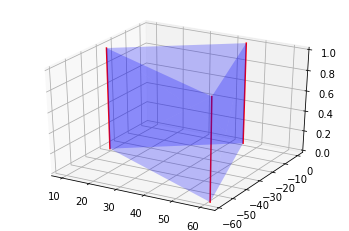

In [2]:
sp = stare_prism(siv=1,tiv_mock=[0,1])

fig = plt.figure() 
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

# usr_figax = add_coastlines(usr_figax)

# ,colors=plt.cm.CMRmap
usr_figax = sp.plot0(
    usr_figax
    ,color='blue'
    ,alpha=0.25
    ,prism_edge_color='red'
    ,end_faces_plot=[False,False]
)

usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

plt.show() 
del usr_figax

resolution (1000.000000 km) ~ level = 3, (float 3.356144)
(lon,lat)=(-155.602778,19.479444) -> spatial_id = 0x2c2401f47797ec43

Full spatial id:              0x2c2401f47797ec43
Geolocation part (bits 61-5): 0x2c2401f47797ec40
Resolution part  (bits  4-0): 0x0000000000000003


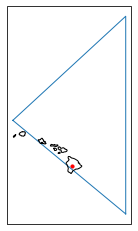

In [3]:
# Set longitude and latitude in degrees to the summit of Mauna Loa.
lon = -155.602778
lat =   19.479444

# Set some unit assumptions
km  = 1
deg = 1

# Set the length scale of a neighborhood triangular element (trixel) about the location.
resolution_scale_km = 1000*km

# Determine the resolution, i.e. the level of the spatial quadtree, of that length scale.
spatial_resolution_level = int(pystare.spatial_resolution_from_km(resolution_scale_km))

# Calculate the spatial index value.
spatial_id = pystare.from_latlon([lat],[lon],spatial_resolution_level)

# Print to check.
print('resolution (%f km) ~ level = %i, (float %f)'%(resolution_scale_km
                                          ,spatial_resolution_level
                                          ,pystare.spatial_resolution_from_km(resolution_scale_km)))
print('(lon,lat)=(%f,%f) -> spatial_id = %s'%(lon,lat,hex16(spatial_id[0])))
print()
print('Full spatial id:              %s'%(hex16(spatial_id[0])))
print('Geolocation part (bits 61-5): %s'%(hex16(spatial_id[0] & (~31))))
print('Resolution part  (bits  4-0): %s'%(hex16(spatial_id[0] & ( 31))))

# Plot the trixel associated with the spatial index value
usr_figax = hello_plot(spatial_id,show_fig=False)
# usr_figax = add_coastlines(figax_container(plt.subplots(subplot_kw={'projection':proj,'transform':transf})))

# Plot the geolocation (lon,lat) as a red dot.
usr_figax.ax.scatter([lon],[lat],s=10,c='r')
plt.show()
del usr_figax

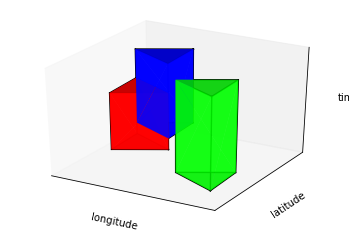

In [4]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

# usr_figax = hello_plot(spatial_id,show_fig=False)

if False:
    sp = stare_prism(siv=1,tiv_mock=[0,1]
    #                 ,color_reverse='red'
    #                 ,color='red'
    #                 ,color_forward='red'
                    )
    # ,colors=plt.cm.CMRmap
    sp.plot1(
        usr_figax
    #    ,color='blue'
        ,alpha=0.8
    #    ,prism_edge_color='k'
    #    ,edge_color='k'
    )

if False:
    for siv in [10,11,12,13,14]:
        sp = stare_prism(siv=siv,tiv_mock=[0,1]
                         ,color=mpl.colors.rgb2hex([(siv-9.0)/5,0.5,(15-siv)/5])
                        )
        sp.plot1(
            usr_figax
            ,alpha=(siv-9)/6.0
            ,prism_edge_color='k'
        )

spatial_id[0] = (spatial_id[0] & (~31)) | 10
        
if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]+spatial_increment
        sp = stare_prism(siv=siv
                         ,color=mpl.colors.rgb2hex([0,1,0])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         ,tiv_mock=numpy.array([0.2,0.7,0.9,1.75])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.7
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )   
        
if True:
    for siv in spatial_id:
        sp = stare_prism(siv=siv,tiv_mock=[0,1]
                         ,color=mpl.colors.rgb2hex([1,0,0])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )      

        
if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,color=mpl.colors.rgb2hex([0,0,1])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         ,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )      
                 
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax

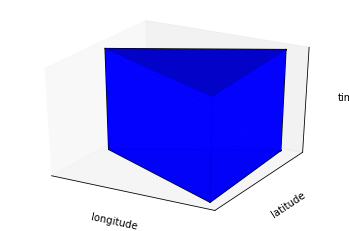

In [5]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,tiv=numpy.array([0x1f484ade232b1b6d],dtype=numpy.int64)
                         ,color=mpl.colors.rgb2hex([0,0,1])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )     

#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax

In [6]:
n = 180
# times = numpy.arange(n,dtype=numpy.double)/(24.0*60.0) + 2440000.0
times = numpy.full([n],fill_value=2440000.0,dtype=numpy.double)
lons  = numpy.zeros([n],dtype=numpy.double)
lats  = numpy.zeros([n],dtype=numpy.double)

for i in range(int(n/2)):
    lons[i] = 0
    lats[i] = i
    lons[int(i+n/2)] = 180.0
    lats[int(i+n/2)] = n/2 - i

In [28]:
n = 64
times = numpy.arange(n,dtype=numpy.double)/(24.0*60.0) + 2440000.0
# times = numpy.full([n],fill_value=2440000.0,dtype=numpy.double)
lons  = numpy.zeros([n],dtype=numpy.double)
lats  = numpy.zeros([n],dtype=numpy.double)

for i in range(int(n)):
    lons[i] = math.sin(math.pi*i/n)
    lats[i] = math.cos(math.pi*i/n)

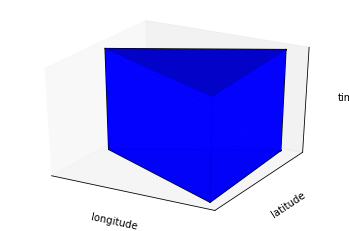

In [22]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))


if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        siv = spatial_id[0]-spatial_increment
        sp = stare_prism(siv=siv
                         ,tiv=numpy.array([0x1f484ade232b1b6d],dtype=numpy.int64)
                         ,color=mpl.colors.rgb2hex([0,0,1])
                         # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                         #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                        )
        
        end_faces_plot = [False]*6
        end_faces_plot[0]=True
        end_faces_plot[5]=True
        
        sp.plot1_simple(
            usr_figax
            ,alpha=0.9
            ,prism_edge_color='k'
            ,end_faces_plot=end_faces_plot
        )     

#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax

In [29]:
sivs = pystare.from_latlon(lats,lons,10)

In [30]:
tivs = pystare.from_JulianTAI(times,numpy.zeros(times.shape,dtype=numpy.double))
tivs = pystare.set_reverse_resolution(tivs,numpy.full(tivs.shape,fill_value=40,dtype=numpy.int64))
tivs = pystare.set_forward_resolution(tivs,numpy.full(tivs.shape,fill_value=40,dtype=numpy.int64))

In [31]:
color_scale = 1.0 / len(sivs)

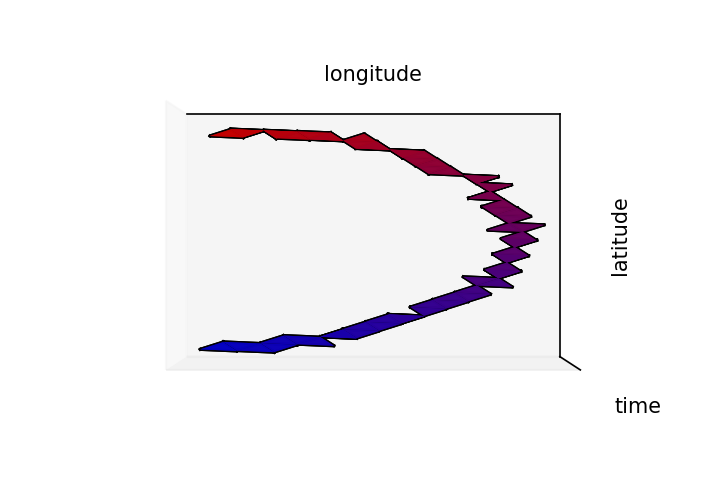

In [39]:
usr_figax = FigAxContainer((plt.figure(),plt.axes(projection='3d')))

if True:
    spatial_increment = pystare.spatial_increment_from_level(spatial_id[0] & 31 )
    if True:
        for i in range(len(tivs)):
        # for i in range(5):
            siv = sivs[i]
            # print('siv: ',siv)
            tiv = tivs[i]
            sp = stare_prism(siv=siv
                             ,tiv=tiv
                             ,color=mpl.colors.rgb2hex([(len(tivs)-i)*color_scale,0,i*color_scale])
                             # ,color=mpl.colors.rgb2hex([0.5,0.5,0.5])
                             #,tiv_mock=numpy.array([0.2,0.7,0.9,1.5])
                            )
        
            end_faces_plot = [False]*6
            end_faces_plot[0]=True
            end_faces_plot[5]=True
        
            sp.plot1_simple(
                usr_figax
                ,alpha=0.9
                ,prism_edge_color='k'
                ,end_faces_plot=end_faces_plot
            )     

# add_coastlines(usr_figax,set_global=True)
            
usr_figax.ax.view_init(elev=90.,azim=-90)
# usr_figax.ax.set_top_view()
            
#usr_figax.ax.axes.set_zlim3d(bottom=0.0,top=1.0)

usr_figax.ax.get_xaxis().set_ticks([])
usr_figax.ax.set_xlabel('longitude')

usr_figax.ax.get_yaxis().set_ticks([])
usr_figax.ax.set_ylabel('latitude')

usr_figax.ax.get_zaxis().set_ticks([])
usr_figax.ax.set_zlabel('time')

plt.show() 
del usr_figax

In [40]:
lines0 = list(cf.COASTLINE.with_scale('10m').geometries()) # Can be 10m, 50m, and 110m
print('len lines0: ',len(lines0))
if len(lines0) == 134:    # 110m
    line_idx = [107,108,109,110,111]
elif len(lines0) == 1428: # 50m
    line_idx = [802,803,804,805,806,807,808]
    # line_idx = [i for i in range(0,1399)]
elif len(lines0) == 4133: # 10m
    line_idx = [1672,1673,1675,1680,1685,1690,1699,1705]
else:
    print('cf.COASTLINE has unknown size or resolution')

len lines0:  4133


ValueError: Image "hypso_10m_sr_ob_dr" and resolution "low" are not present in the user background image metadata in directory "/Users/mrilee/opt/anaconda3/envs/stare/lib/python3.7/site-packages/cartopy/data/raster/natural_earth"

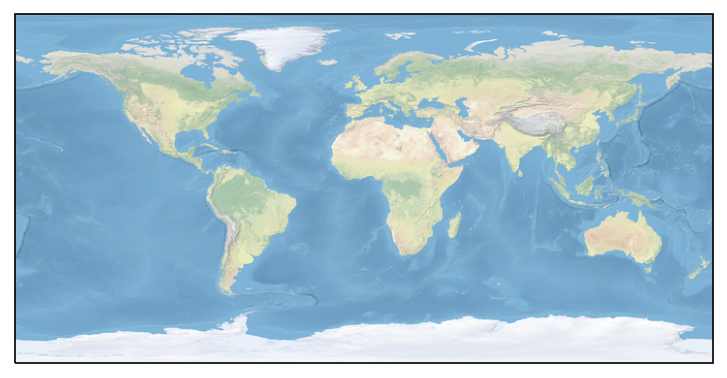

In [44]:
# Make covers from shapely polygons using non-convex hulls

import shapely
import starepandas

figax = hello_plot(set_coastlines=False,set_global=False,show_fig=False)  

lines = [ lines0[i] for i in line_idx ]
multiline = shapely.geometry.MultiLineString(lines)

# figax.ax.add_geometries(multiline,cf.COASTLINE.crs,color='c',alpha=0.5)
# figax.ax.set_extent(numpy.array(multiline.bounds)[[0,2,1,3]])

# lons,lats = lonlat_from_coords(list(lines[0].coords))

# cover_resolution = 12
cover_resolution = 10

covers = []
for k in range(len(lines)):
#    lons,lats = lonlat_from_coords(list(lines[k].coords))
    covers = covers + [starepandas.from_polygon(shapely.geometry.polygon.orient(shapely.geometry.Polygon(lines[k]),1)
                                       ,level=cover_resolution,convex=False)]
    
    #  ,resolution=cover_resolution,nonconvex=True)]
    
#    covers = covers + [pystare.to_nonconvex_hull_range_from_latlon(lats,lons,resolution=10)]
#    covers = covers + [pystare.to_hull_range_from_latlon(lats,lons,resolution=10)]

    # Default Cartopy background imagery
    # figax.ax.stock_img()

    # For an example of how to add imagery for background_img, see extras/05-FetchNaturalEarth-1.
    figax.ax.background_img(name='ne_shaded') # Identical to stock_img.
    # figax.ax.background_img(name='ne1_50m_sr_w')
    # figax.ax.background_img(name='ne1_10m_sr_w_dr')
    # figax.ax.background_img(name='hypso_50m_sr_w')
    figax.ax.background_img(name='hypso_10m_sr_ob_dr')

    
    # figax = hello_plot(pysta.expand_intervals(covers[k],8),figax,show=False)
    figax = hello_plot(covers[k],figax,show_fig=False)
                      
figax.ax.set_extent(numpy.array([-160.3, 18.5, -154.5, 22.5])[[0,2,1,3]])

plt.show() # May have to Cell->Current Outputs->Toggle Scrolling to see full figure.
del figax